# Read COD database

In [17]:
import pandas as pd
columns = ["formula","calcformula",'a','b','c','alpha','beta','gamma']
sep = '\t'

df = pd.read_csv("cod_all.csv", 
                 usecols=columns,
                 sep=sep,
#                  nrows=10,
                 memory_map=True
                ) 

In [18]:
df.describe()

a              b              c          alpha  \
count  468793.000000  468793.000000  468793.000000  468793.000000   
mean       12.557460      13.423207      16.389136      89.765122   
std         6.858872       6.631268       8.065702       6.769149   
min         1.497400       1.497400       1.606500      13.930000   
25%         8.315700       9.189000      11.324400      90.000000   
50%        10.806700      12.155500      15.196400      90.000000   
75%        14.739700      16.166100      19.889000      90.000000   
max       189.800000     150.000000     475.977800     150.172000   

                beta          gamma  
count  468793.000000  468793.000000  
mean       95.474028      91.175824  
std        10.443408       9.748185  
min        11.930000      13.930000  
25%        90.000000      90.000000  
50%        92.480000      90.000000  
75%       101.701000      90.000000  
max       173.895000     149.900000

In [20]:
df.nunique()

a              163546
b              167775
c              176115
alpha           47901
beta            65188
gamma           49033
formula        362941
calcformula    366804
dtype: int64

<AxesSubplot:ylabel='Frequency'>

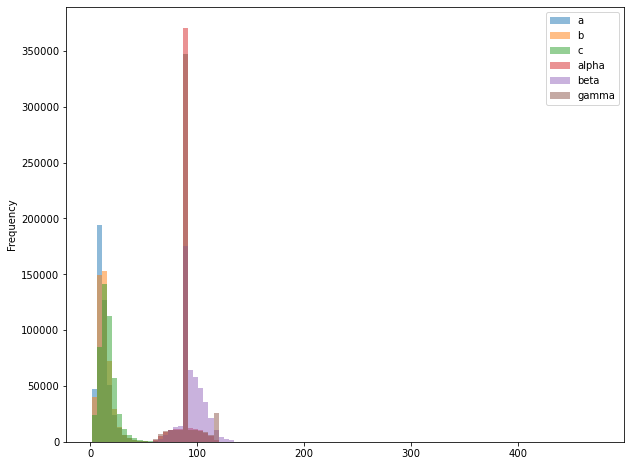

In [35]:
df.plot.hist(bins=100,alpha=0.5,figsize=(10,8))

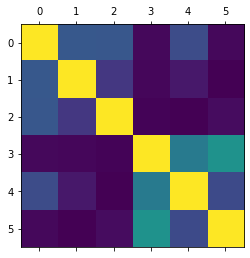

In [38]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

In [42]:
df.loc[:,"Composition"] = df.loc[:,"formula"].str.findall(r'([A-Z][a-z]*)(\d*[.]*\d*)\s*')
df.loc[:,"calcComposition"] = df.loc[:,"calcformula"].str.findall(r'([A-Z][a-z]*)(\d*[.]*\d*)\s*')

In [43]:
df.head()

a        b        c  alpha     beta  gamma  \
0   7.8783  10.4689  16.0680   90.0   95.147   90.0   
1  48.4800  21.7200  10.7400   90.0   90.000   90.0   
2   6.3410  16.8800   5.7798   90.0   97.600   90.0   
3   7.9661   9.2050   7.3198   90.0  102.104   90.0   
4  18.5170  18.5170  11.0066   90.0   90.000   90.0   

                          formula                     calcformula  \
0          - C5 H17 Al N2 O8 P2 -          - C5 H17 Al N2 O8 P2 -   
1           - C107 H142 N14 O26 -           - C107 H142 N14 O26 -   
2                 - C3 D3 O7 Sr -                 - C3 D3 O7 Sr -   
3                    - C3 O6 Sr -                    - C3 O6 Sr -   
4  - C44 H58 Cu4 F12 N20 O25 S4 -  - C44 H52 Cu4 F12 N20 O25 S4 -   

                                         Composition  \
0  [(C, 5), (H, 17), (Al, ), (N, 2), (O, 8), (P, 2)]   
1             [(C, 107), (H, 142), (N, 14), (O, 26)]   
2                   [(C, 3), (D, 3), (O, 7), (Sr, )]   
3                           [(C, 3), (O, 6), (Sr, )]   
4  [(C, 44), (H, 58), (Cu, 4), (F, 12), (N, 20), ...   

                                     calcComposition  
0  [(C, 5), (H, 17), (Al, ), (N, 2), (O, 8), (P, 2)]  
1             [(C, 107), (H, 142), (N, 14), (O, 26)]  
2                   [(C, 3), (D, 3), (O, 7), (Sr, )]  
3                           [(C, 3), (O, 6), (Sr, )]  
4  [(C, 44), (H, 52), (Cu, 4), (F, 12), (N, 20), ...

In [13]:
df.loc[1,"text"]

'Bachet, Bernard; Soyer, Alain; Billy, Isabelle; Mornon, Jean-Paul\\nPristinamycin complex solved using Shake-and-Bake\\n\\n\\n()\\n'